# OpenCV 中的图像处理
## 颜色空间转换
## 目标
- 你将学习如何对图像进行颜色空间转换，比如从 BGR 到灰度图，或者从BGR 到 HSV 等。
- 我没还要创建一个程序用来从一幅图像中获取某个特定颜色的物体。
- 我们将要学习的函数有： cv2.cvtColor()， cv2.inRange() 等。


## 9.1 转换颜色空间
在OpenCV中有超过150种进行颜色空间转换的方法。但是你以后就会发现我们经常用到的也就两种：  
BGR↔Gray和BGR↔HSV。  
我们要用到的函数是：cv2.cvtColor(input_image，flag)，其中flag就是转换类型。    
对于BGR↔Gray的转换，我们要使用的flag就是cv2.COLOR_BGR2GRAY。同样对于BGR↔HSV的转换,我们用的flag就是cv2.COLOR_BGR2HSV。你还可以通过下面的命令得到所有可用的flag。

In [ ]:
import cv2

flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
print(flags)

<table><tr><td bgcolor=green><p algin=left>
    注意：在OpenCV的HSV格式中，H（色彩/色度）的取值范围是[0,179]，S（饱和度）的取值范围 [0,255],V（亮度）的取值范围[0,255]。但是不同的软件使用的值可能不同。所以当你需要拿OpenCV的HSV值与其他软件的HSV值进行对比时，一定要记得归一化。</p></td></tr></table>

## <font color=blue>BGR与HSV</font>  

### <font color=blue>BGR</font>  
BGR的色彩空间：
![avatar](BGR.jpg)

### <font color=blue>HSV(Hue,Saturation,Value)</font>  
是根据颜色的直观特性由A.R.Smith在1978年创建的一种颜色空间，也称为六角维体模型（HexconeModel），这个模型中颜色的参数分别是：色调（H）、饱和度（S）、亮度（V）。  
- 色调H：用角度度量，取值范围0-360度，从红色开始按逆时针方向计算，红色为0度，绿色为120度，蓝色为240度。它们的补色是：黄色60度，青色为180度，品红色为300度  
- 饱和度S：取值范围为0.0-1.0  
- 亮度V：取值范围为0.0（黑色）-1.0（白色）  
BGR和CMY颜色模型都是面向硬件的，而HSV（Hue Saturation Value）颜色模型是面向用户的  

HSV的色彩空间：  
![HSV的色彩空间](HSV.jpg)  
HSV模型的三维表示从RGB里立方体演化而来  
设想从RGB沿立方体对角线的白色顶点向黑色顶点观察，就可以看到立方体的六边形外形  
六边形边界表示色彩，水平轴表示纯度，明度沿垂直轴测量


### <font color=blue>opencv中的HSV取值范围</font>  
在opencv中颜色的参数及取值范围分别为：  
- 色调Hue：[0,179]
- 饱和度Saturation:[0,255]
- 亮度Value:[0,255]  
不同的软件使用不同的取值范围，为了对比，通常需要对这些范围进行标准化

## 9.2 物体跟踪  
现在我们知道怎样将一幅图像从BGR转换到HSV了，我们可以利用这
一点来提取带有某个特定颜色的物体，在HSV颜色空间中要比在 BGR 空间
中更容易表示一个特定颜色。在我们的程序中，我们要提取的是一个蓝色的物
体。下面就是就是我们要做的几步：
- 从视频中获取每一帧图像
- 将图像转换到 HSV 空间
- 设置 HSV 阈值到蓝色范围。
- 获取蓝色物体，当然我们还可以做其他任何我们想做的事，比如：在蓝色物体周围画一个圈。  
下面就是我们的代码：

In [ ]:
import cv2
import numpy as np

img=cv2.imread('trace.png')
hsv=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

# 设定蓝色的阈值
lower_blue=np.array([110,50,50])
upper_blue=np.array([130,255,255])

# 根据阈值构建掩模
mask=cv2.inRange(hsv,lower_blue,upper_blue)
# 对原图像和掩模进行位运算
res=cv2.bitwise_and(img,img,mask=mask)
# 显示图像
cv2.imshow('frame',img)
cv2.imshow('mask',mask)
cv2.imshow('res',res)
k=cv2.waitKey(0)
cv2.destroyAllWindows()

<table><tr><td bgcolor=green><p algin=left>
注意：图像中仍然有一些噪音，我们会在后面的章节中介绍如何消减噪音。  <br/>
注意：这是物体跟踪中最简单的方法。当你学习了轮廓之后，你就会学到更多相关知识，那时你就可以找到物体的重心，并根据重心来跟踪物体，仅仅在摄像头前挥挥手就可以画出同的图形，或者其他更有趣的  
</p></td></tr></table>

##  <font color=blue>用SHV进行目标检测</font>  
首先读取图片，为了说明效果，在图片上画一个蓝色的点，我们要把铁塔作为目标检测出来  
  
  
  
#### <font color=blue>第一步：</font>在图片上画一个蓝色的点

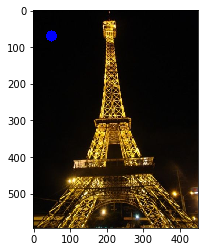

In [23]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

frame = cv.imread("tower.jpg",1)
cv.circle(frame,(50,70),15,(255,0,0),-1)
imageRGB = cv.cvtColor(frame,cv.COLOR_BGR2RGB)
plt.imshow(imageRGB)
plt.show()

#### <font color=blue>第二步：</font>BGR 转换为HSV

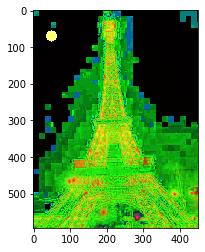

In [24]:
hsv = cv.cvtColor(frame,cv.COLOR_BGR2HSV)
## 可以用窗口将hsv显示出来
# cv.imshow('hsv',hsv)
# k = cv.waitKey(0)&0xFF
# cv.destroyAllWindows()

## 用matplotlib显示
imageRGB = cv.cvtColor(hsv,cv.COLOR_BGR2RGB)
plt.imshow(imageRGB)
plt.show()

#### <font color=blue>第三步：</font>为图像设置阈值的取值范围，筛选出目标位置，并做成mask  
具体阈值范围的确定，我们在后面介绍，先来看一下效果

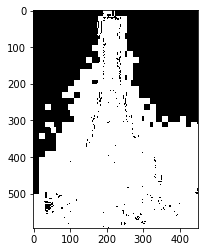

In [42]:
# 确认HSV值范围
lower_blue = np.array([0,29,0])
upper_blue = np.array([115,255,255])

# 使用阈值，确定范围
mask = cv.inRange(hsv,lower_blue,upper_blue)
# print(mask[50]) ##mask的元素值，是0或者255
imageRGB = cv.cvtColor(mask,cv.COLOR_BGR2RGB)
plt.imshow(imageRGB)
plt.show()

#### <font color=blue>第四步：</font>mask和原图像进行按位与(Bitwise_and),从而将目标筛选出来，可以看到，蓝色的点不见了

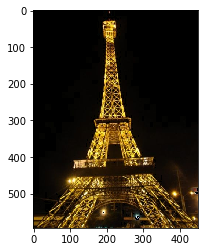

In [43]:
res = cv.bitwise_and(frame,frame,mask = mask)
imageRGB = cv.cvtColor(res,cv.COLOR_BGR2RGB)
plt.imshow(imageRGB)
plt.show()

## <font color=blue>注意：</font>如何找HSV值的范围   


### <font color=blue>一、通过数值转换查找</font>

比如知道蓝色的BGR的范围，先查找纯蓝色的HSV的值

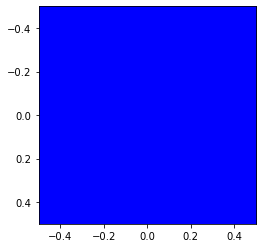

In [13]:
blue = np.uint8([[[255,0,0]]])
imageRGB = cv.cvtColor(blue,cv.COLOR_BGR2RGB)
plt.imshow(imageRGB)
plt.show()

bgr的蓝色转换为hsv

[[[120 255 255]]]


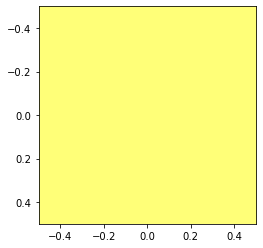

In [15]:
hsv_blue = cv.cvtColor(blue,cv.COLOR_BGR2HSV)
print(hsv_blue)
imageRGB = cv.cvtColor(hsv_blue,cv.COLOR_BGR2RGB)
plt.imshow(imageRGB)
plt.show()

此时得到的，是蓝色的hsv值，那么取蓝色的范围，可以是[H-10,100,100]到[H+10,255,255]

### <font color=blue>二、通过滑块查找</font>  
并通过滑块调节HSV阈值，实施显示，可以确定取值范围，该交互方法可以在本地运行，这里只展示代码

In [2]:
import cv2 as cv
import numpy as np

# 读取图片

# HSV色彩空间图
# frame = cv2.imread("HSV.jpg")

## 铁塔图像
# frame = cv2.imread("tower.jpg")
# cv2.circle(frame,(50,70),15,(255,0,0),-1)

# ## 练习题图像
frame = cv.imread("color.png",1)
cv.imshow("RGB",frame) 

# 设置初始值
hsv_low = np.array([0,0,0])
hsv_high = np.array([0,0,0])

# 下面几个函数，写得有点冗余
 
def h_low(value):
    hsv_low[0] = value
 
def h_high(value):
    hsv_high[0] = value
 
def s_low(value):
    hsv_low[1] = value
 
def s_high(value):
    hsv_high[1] = value
 
def v_low(value):
    hsv_low[2] = value
 
def v_high(value):
    hsv_high[2] = value
 
cv2.namedWindow('image')
cv2.createTrackbar('H low', 'image', 0, 179, h_low) 
cv2.createTrackbar('H high', 'image', 0, 179, h_high)
cv2.createTrackbar('S low', 'image', 0, 255, s_low)
cv2.createTrackbar('S high', 'image', 0, 255, s_high)
cv2.createTrackbar('V low', 'image', 0, 255, v_low)
cv2.createTrackbar('V high', 'image', 0, 255, v_high)
 
while True:
    dst = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV) # BGR转HSV
    dst = cv2.inRange(dst, hsv_low, hsv_high) # 通过HSV的高低阈值，提取图像部分区域
    cv2.imshow('dst', dst)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cv2.destroyAllWindows()

## 9.3 怎样找到要跟踪对象的HSV值？
这是我在stackoverflow.com上遇到的最普遍的问题。其实这真的很简单，函数cv2.cvtColor()也可以用到这里。但是现在你要传入的参数是（你想要的）BGR值而不是一副图。例如，我们要找到绿色的HSV值，我们只需在终输入以下命令：

In [45]:
import cv2
import numpy as np

# green=np.uint8([0,255,0])
#hsv_green=cv2.cvtColor(green,cv2.COLOR_BGR2HSV)

#scn (the number of channels of the source),
#i.e. self.img.channels(), is neither 3 nor 4.
#
#depth (of the source),
#i.e. self.img.depth(), is neither CV_8U nor CV_32F.
# 所以不能用 [0,255,0]，而要用 [[[0,255,0]]]
# 这里的三层括号应该分别对应于 cvArray， cvMat， IplImage

green=np.uint8([[[0,255,0]]])
hsv_green=cv2.cvtColor(green,cv2.COLOR_BGR2HSV)
print(hsv_green)

[[[ 60 255 255]]]


现在你可以分别用 [H-100，100，100] 和 [H+100，255，255] 做上
下阈值。除了这个方法之外，你可以使用任何其他图像编辑软件（例如 GIMP）
或者在线转换软件找到相应的 HSV 值，但是最后别忘了调节 HSV 的范围。


## 更多资源
### 练习
1. 尝试同时提取多个不同的颜色物体，比如同时提取红，蓝，绿三个不同颜色的物体。

Using matplotlib backend: TkAgg


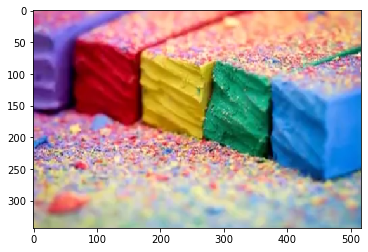

In [46]:
%matplotlib
import cv2 as cv
import numpy as np

frame = cv.imread("color.png",1)
imageRGB = cv.cvtColor(frame,cv.COLOR_BGR2RGB)
plt.imshow(imageRGB)
plt.show()

In [54]:
# 转换到HSV
hsv = cv.cvtColor(frame,cv.COLOR_BGR2HSV)


lower_red_1 = np.array([166,100,100])
upper_red_1 = np.array([180,255,255])
lower_red_2 = np.array([0,100,100])
upper_red_2 = np.array([4,255,255])

lower_yellow_green = np.array([20,100,100])
upper_yellow_green = np.array([94,255,255])



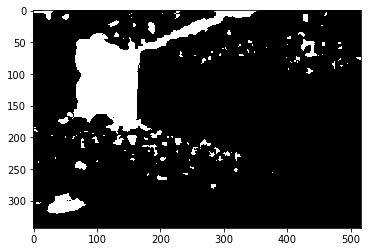

In [55]:
# 根据阈值创建掩膜
mask_red_1 = cv.inRange(hsv,lower_red_1,upper_red_1)
mask_red_2 = cv.inRange(hsv,lower_red_2,upper_red_2)
mask_yellow_green = cv.inRange(hsv,lower_yellow_green,upper_yellow_green)

# mask合并
mask_red = cv.bitwise_or(mask_red_1,mask_red_2)
imageRGB = cv.cvtColor(mask_red,cv.COLOR_BGR2RGB)
plt.imshow(imageRGB)
plt.show()

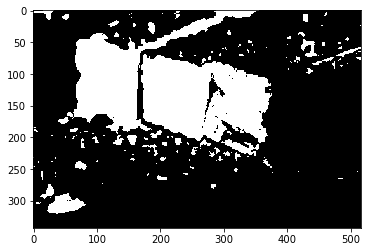

In [56]:
mask = cv.bitwise_or(mask_red,mask_yellow_green)
imageRGB = cv.cvtColor(mask,cv.COLOR_BGR2RGB)
plt.imshow(imageRGB)
plt.show()

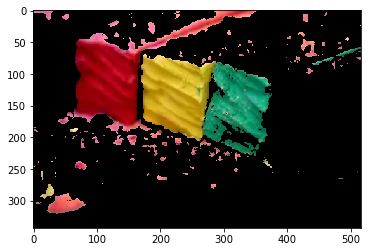

In [59]:
#对原图像和掩膜进行进行位运算
res = cv.bitwise_and(frame,frame,mask = mask)

#显示图像
imageRGB = cv.cvtColor(res,cv.COLOR_BGR2RGB)
plt.imshow(imageRGB)
plt.show()